## Part 1 ‐ Exploratory data analysis

In [256]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
print('done')

done


In [130]:
df = pd.read_json('logins.json')
df['login_count'] = 1
login_data = df.set_index(pd.to_datetime(df['login_time'], unit='s'))[['login_count']]
login_15m = login_data.resample('15Min').sum()

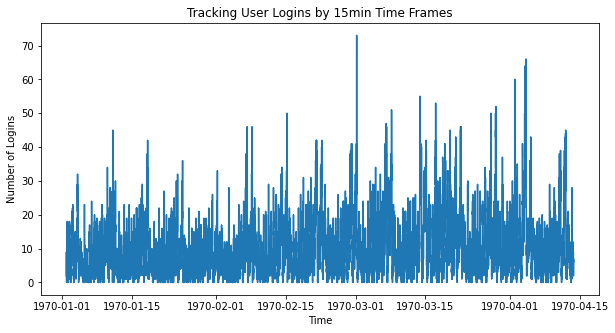

In [141]:
fig, ax = plt.subplots(figsize = (10,5))
plt.xlabel('Time')
plt.ylabel('Number of Logins')
plt.title('Tracking User Logins by 15min Time Frames')
plt.plot(login_15m.index, login_15m.login_count)

There seems to be a pattern but it is difficult to tell by looking at 15min time frames. Due to the volume and spikes in the chart, it would be better to analyze this data on an hourly basis to get a better understanding of user logins through the day.

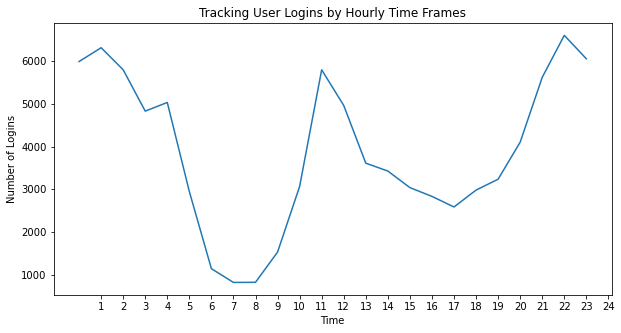

In [168]:
hourly_count = df.groupby(df['login_time'].dt.hour).sum().reset_index()
fig, ax = plt.subplots(figsize = (10,5))
plt.xlabel('Time')
x = np.arange(1, 25, 1)
plt.xticks(x)
plt.ylabel('Number of Logins')
plt.title('Tracking User Logins by Hourly Time Frames')
plt.plot(hourly_count.index, hourly_count.login_count)

This chart shows us the user logins on an hourly basis. Starting around 8/9am there is a spike in user logins which lasts until 11 am. Then a gradual decline until 5pm and then it spikes again until 10pm. This chart gives us a much better understanding of our users login habits.

Finally, let's take a look at the login data by each day of the week

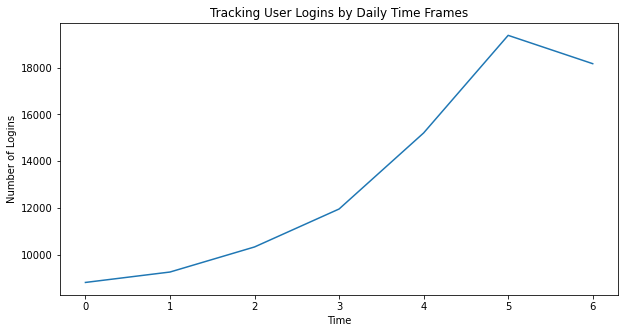

In [167]:
hourly_count = df.groupby(df['login_time'].dt.day_of_week).sum().reset_index()
fig, ax = plt.subplots(figsize = (10,5))
plt.xlabel('Time')
x = np.arange(0, 8, 1)
plt.xticks(x)
plt.ylabel('Number of Logins')
plt.title('Tracking User Logins by Daily Time Frames')
plt.plot(hourly_count.index, hourly_count.login_count)

This chart gives us great insight into which days of the week are the busiest. Mondays are the slowest days for user logins and it increase every day of the week until Sunday when it slightly drops below the Saturday logins, but Sunday logins are still significantly higher than the weekday logins.

## Part 2 ‐ Experiment and metrics design

1) What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?

A: The metric I would choose for this experiment is number of drivers that drove from one city to another. Since, Ultimate Gotham is most active at night I would look at toll data of number of cars that come in from Metropolis to Gotham at night and vice-versa for Ultimate Metropolis. We would need to look at pre-experiment and post-experiment data to conclude whether the experiment was a success or not.

2) Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:

a) how you will implement the experiment

b) what statistical test(s) you will conduct to verify the significance of the observation

c) how you would interpret the results and provide recommendations to the city operations team along with any caveats.

A: Assuming there is no historical data for us to analyze. I'd have to start from the beginning. For one month, I would track the amount of cars that came in during weekdays from Metropolis to Gotham at night which we can define as 8pm to 5:59 am and I would track the amount of cars that came in from Gotham to Metropolis during the day which we can define as 6am to 7:59pm. 

Then install the toll reimbursement act.

Then, I would track the same data as above for a month after the reimbursement act and then use it to perform a hypothesis test.

H0: There is no difference between the mean number of cars entering one city from another per day

HA: There is a difference between the mean number of cars entering one city from another per day

Once, I have the data I would use a paired t-test to get the p-value.

If p-value is less than 0.5, I would reject the null hypothesis and tell the Ultimate managers to continue with the toll reimbursement act.

If p-value is greater than 0.5, we would fail to reject the null hypothesis and I would the Ultimate managers to find another way to incentivize driving partners to travel from city to city.



## Part 3 ‐ Predictive modeling

In [242]:
df_3 = pd.read_json('ultimate_data_challenge.json')
df_3.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [227]:
df_3.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


In [228]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [243]:
# I will take a look at the city and phone dtypes for their values
print(df_3['city'].value_counts())
print(' ')
print(df_3['city'].isna().sum())
print(' ')
print(df_3['phone'].value_counts())
print(' ')
print(df_3['phone'].isna().sum())
# There are 396 NA values in the 'phone' column, I will fill these fields in as 'x'
df_3['phone'].fillna('x', inplace=True)
# There are no typos/leading spaces/NA values in these columns so I can create dummy variables for 
#these two string columns 

df_3 = pd.get_dummies(df_3, columns = ['city', 'phone'])

Winterfell        23336
Astapor           16534
King's Landing    10130
Name: city, dtype: int64
 
0
 
iPhone     34582
Android    15022
Name: phone, dtype: int64
 
396


In [244]:
# Now, I will change the date objects into datetime format
df_3['signup_date'] = pd.to_datetime(df_3['signup_date'])
df_3['last_trip_date'] = pd.to_datetime(df_3['last_trip_date'])

In [245]:
# There are now 2 columns left with null values, 'avg_rating_of_driver' and 'avg_rating_by_driver'
# I will fill these values in with the median value of the rest of the column
df_3['avg_rating_of_driver'].fillna(df_3['avg_rating_of_driver'].median(), inplace=True)
df_3['avg_rating_by_driver'].fillna(df_3['avg_rating_by_driver'].median(), inplace=True)
# Now there are no null values - we have an accurate dataset to move onto the EDA section of the analysis

In [246]:
# I want to take a look at what fraction of the observed users were retained, which is defined as 
# the user took a trip in the last 30 days

max = df_3['last_trip_date'].max()
min = max - datetime.timedelta(30)
percent_retained = round(df_3[df_3['last_trip_date'] > min].shape[0] / df_3['last_trip_date'].shape[0] * 100, 2)
percent_retained

36.62

36.62% of users would be considered 'retained' from this dataset.

For the ML analysis, I need to take a look at whether a user will be active or not in their 6th month in the system.

So I will create a new column that adds 6 months to their sign up date and see if the last trip they took is equal to or greater than that number

In [247]:
# For the ML analysis coming, I want to lI am going to mark the users retained or not retained using 1 and 0, respectively
df_3['retained'] = np.where(df_3['last_trip_date']>min, 1, 0)
df_3.head()

,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone,phone_x,retained
0,4,2014-01-25,4.7,1.10,2014-06-17,15.4,True,46.2,3.67,5.0,0,1,0,0,1,0,1
1,0,2014-01-29,5.0,1.00,2014-05-05,0.0,False,50.0,8.26,5.0,1,0,0,1,0,0,0
2,3,2014-01-06,4.3,1.00,2014-01-07,0.0,False,100.0,0.77,5.0,1,0,0,0,1,0,0
3,9,2014-01-10,4.6,1.14,2014-06-29,20.0,True,80.0,2.36,4.9,0,1,0,0,1,0,1
4,14,2014-01-27,4.4,1.19,2014-03-15,11.8,False,82.4,3.13,4.9,0,0,1,1,0,0,0


In [248]:
df_3 = df_3.drop(columns=['signup_date', 'last_trip_date'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(df_3.drop(columns='retained'), df_3.retained, test_size=0.3, random_state=17)

In [249]:
X_train

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone,phone_x
44648,1,5.0,1.00,0.0,True,100.0,18.90,5.0,0,0,1,0,1,0
26307,4,5.0,1.10,11.8,False,58.8,2.55,4.7,0,0,1,0,1,0
8023,1,4.5,1.00,0.0,False,100.0,9.49,5.0,0,0,1,0,1,0
11612,2,4.5,1.00,0.0,True,100.0,18.31,5.0,0,0,1,1,0,0
5672,3,4.7,1.01,3.2,False,61.3,2.68,4.8,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42297,1,4.9,1.00,0.0,False,100.0,7.62,5.0,1,0,0,0,1,0
33174,2,3.3,1.00,0.0,True,66.7,2.75,5.0,0,0,1,0,1,0
46470,1,5.0,1.00,0.0,False,100.0,1.03,5.0,0,0,1,0,1,0
34959,0,4.8,1.17,33.3,False,66.7,2.27,5.0,0,0,1,0,1,0


In [250]:
# I will first start with the Logistic Regression model

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg_pred = logreg.predict(X_test)
print('Accuracy score for Logistic Regression Model: ', round(accuracy_score(y_test, logreg_pred), 2))
print(classification_report(y_test, logreg_pred))

Accuracy score for Logistic Regression Model:  0.72
              precision    recall  f1-score   support

           0       0.74      0.86      0.80      9521
           1       0.67      0.49      0.56      5479

    accuracy                           0.72     15000
   macro avg       0.71      0.67      0.68     15000
weighted avg       0.72      0.72      0.71     15000



/Users/balakandikonda/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [252]:
# Now I will use the Random Forest Classifier

from itertools import product

n_estimators = 100
max_features = [1, 'sqrt', 'log2']
max_depths = [None, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
for f, d in product(max_features, max_depths): # with product we can iterate through all possible combinations
    rf = RandomForestClassifier(n_estimators=n_estimators, 
                                criterion='gini', 
                                max_features=f, 
                                max_depth=d, 
                                n_jobs=2,
                                random_state=17)
    rf.fit(X_train, y_train)
    prediction_test = rf.predict(X=X_test)
    print('Classification accuracy on test set with max features = {} and max_depth = {}: {:.3f}'.format(f, d, accuracy_score(y_test,prediction_test)))

Classification accuracy on test set with max features = 1 and max_depth = None: 0.763
Classification accuracy on test set with max features = 1 and max_depth = 2: 0.685
Classification accuracy on test set with max features = 1 and max_depth = 3: 0.731
Classification accuracy on test set with max features = 1 and max_depth = 4: 0.750
Classification accuracy on test set with max features = 1 and max_depth = 5: 0.762
Classification accuracy on test set with max features = 1 and max_depth = 6: 0.769
Classification accuracy on test set with max features = 1 and max_depth = 7: 0.779
Classification accuracy on test set with max features = 1 and max_depth = 8: 0.780
Classification accuracy on test set with max features = 1 and max_depth = 9: 0.784
Classification accuracy on test set with max features = 1 and max_depth = 10: 0.785
Classification accuracy on test set with max features = 1 and max_depth = 11: 0.786
Classification accuracy on test set with max features = 1 and max_depth = 12: 0.78

Looking at the output above the most accurate parameters are max features = 1 and max_depth = 13 with an accuracy of 0.789.

In [261]:
rf = RandomForestClassifier(n_estimators=100, 
                                criterion='gini', 
                                max_features=1, 
                                max_depth=13, 
                                n_jobs=2,
                                random_state=17)
rf.fit(X_train, y_train)
rf_ypred = rf.predict(X_test)
print('Accuracy score for Logistic Regression Model: ', round(accuracy_score(y_test, rf_ypred), 2))
print(classification_report(y_test, rf_ypred))

Accuracy score for Logistic Regression Model:  0.79
              precision    recall  f1-score   support

           0       0.81      0.87      0.84      9521
           1       0.74      0.64      0.69      5479

    accuracy                           0.79     15000
   macro avg       0.78      0.76      0.76     15000
weighted avg       0.79      0.79      0.78     15000



After running the Logistic Regression and Random Forest models, we've found that the Random Forest is better purely on an accuracy basis. So, let's see find out what the most important features, regarding retention, based on this model.

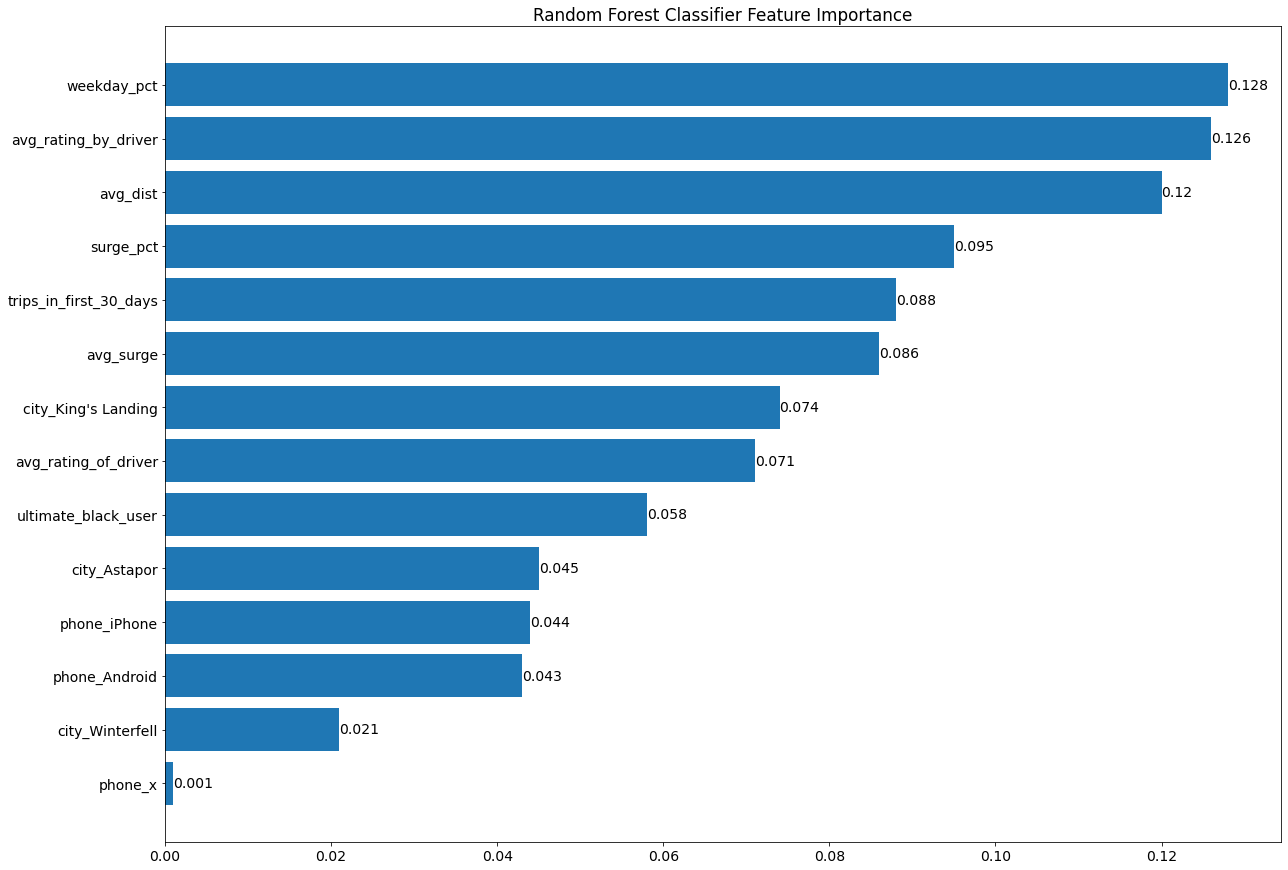

In [269]:
# Random Forest Classifier for finding the most important features
plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})
rounded = np.around(rf.feature_importances_,3)
fig, ax = plt.subplots()
fig.set_size_inches(20, 15)
bars = ax.barh(df_3.drop(columns='retained').columns[rounded.argsort()], rounded[rounded.argsort()])
ax.set_ylim(ax.get_ylim()[::1])
ax.bar_label(bars)
plt.title("Random Forest Classifier Feature Importance")
plt.show()

The 3 most important features for retention according to this Random Forest Classifier are: weekday_pct, avg_rating_by_driver, and avg_dist. 

The Ultimate management team could focus on the customers that fall into the 3 categories that mentioned above. If a new customer is taking long weekday trips and is rated highly by drivers - they could offer them concessions or build additional features that will help them enjoy the ride more or save them money.